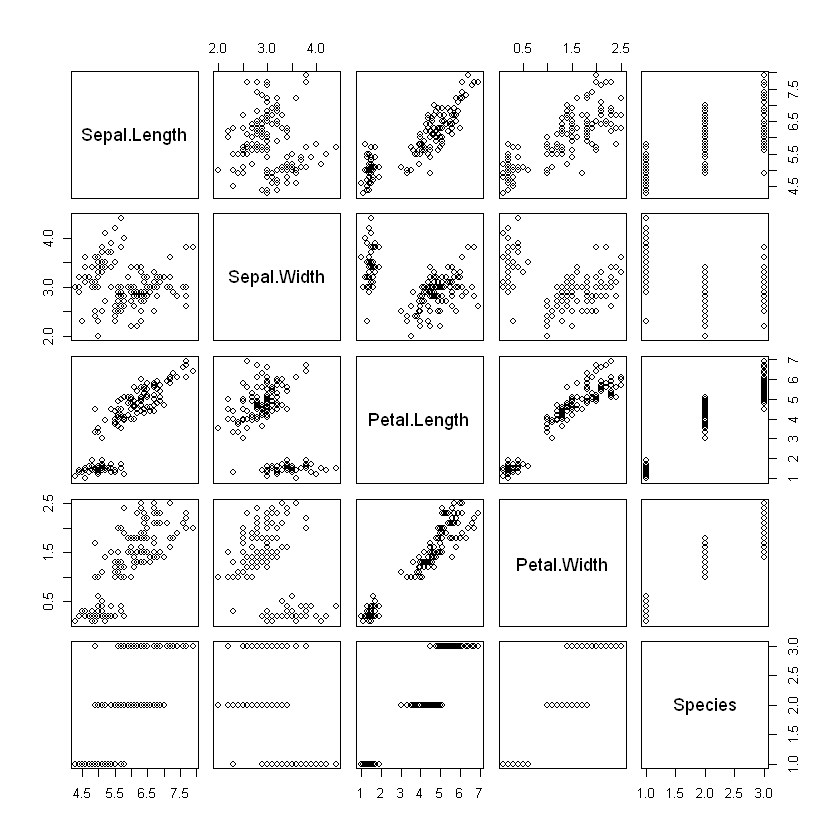

In [1]:
library(ggplot2)
data(iris)

attach(iris)
pairs(iris)

Importance of components:
                          PC1     PC2    PC3     PC4
Standard deviation     2.0563 0.49262 0.2797 0.15439
Proportion of Variance 0.9246 0.05307 0.0171 0.00521
Cumulative Proportion  0.9246 0.97769 0.9948 1.00000

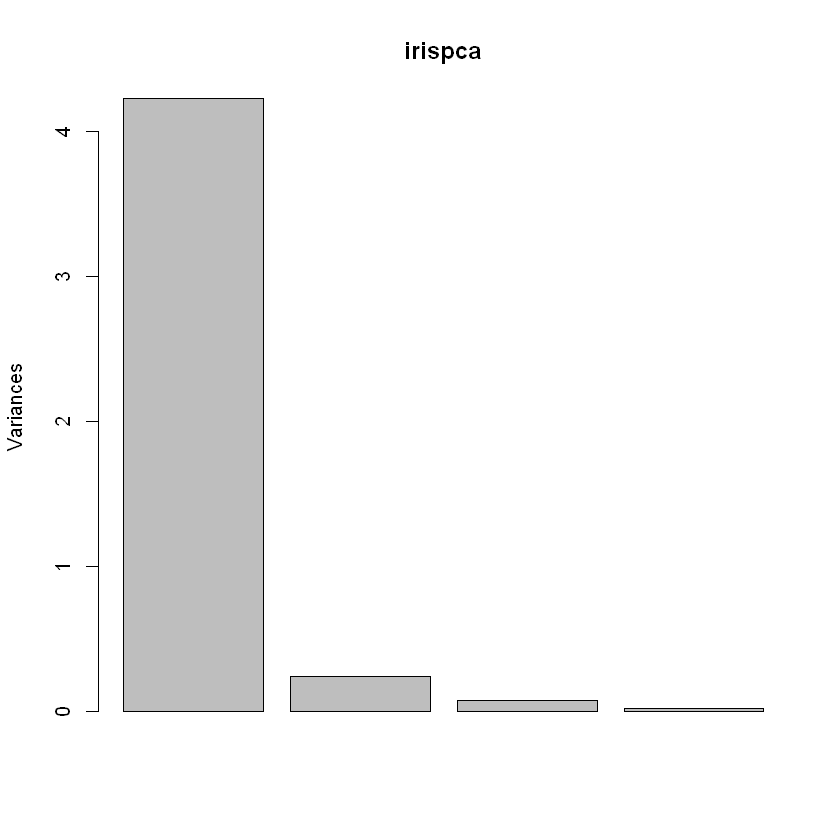

In [2]:
irispca = prcomp(iris[,-5])
summary(irispca)
plot(irispca)

In [3]:
PC1 = irispca$x[,1]
PC2 = irispca$x[,2]
PC3 = irispca$x[,3]
PC4 = irispca$x[,4]

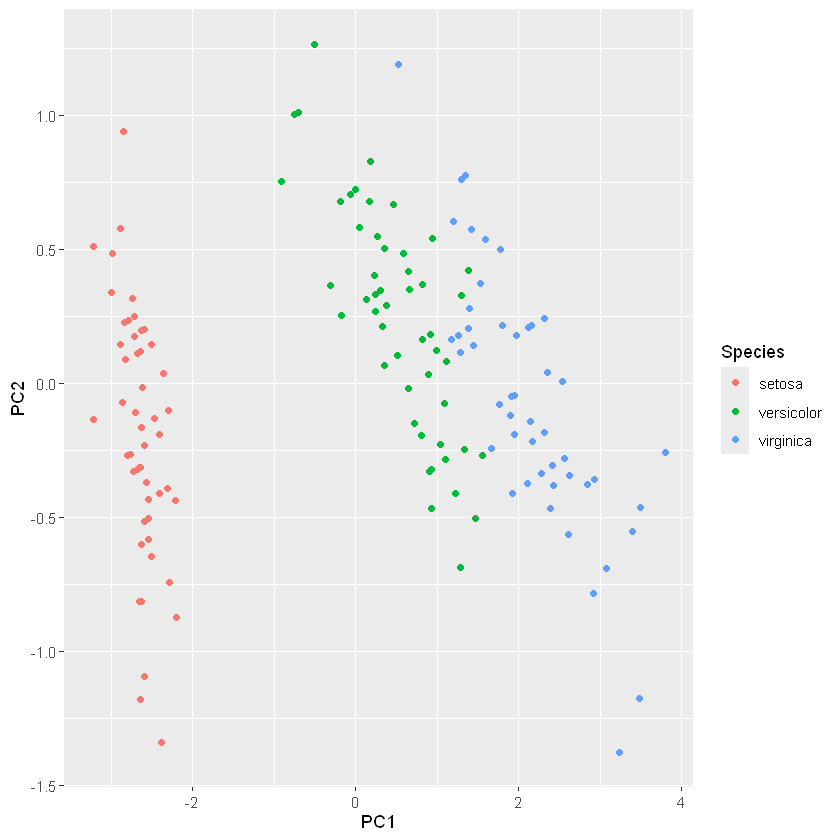

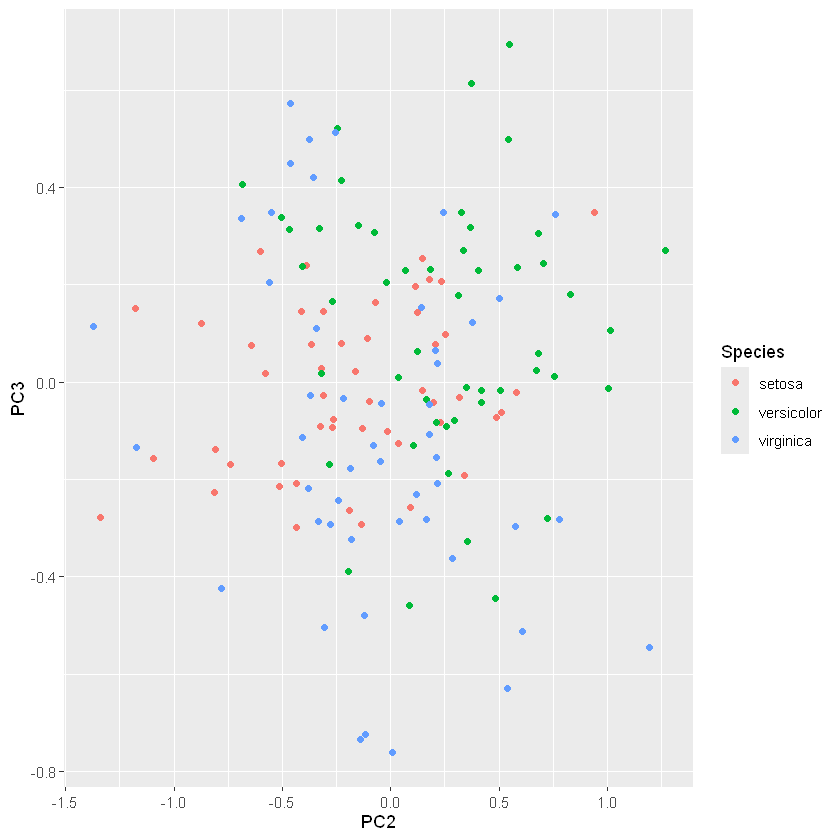

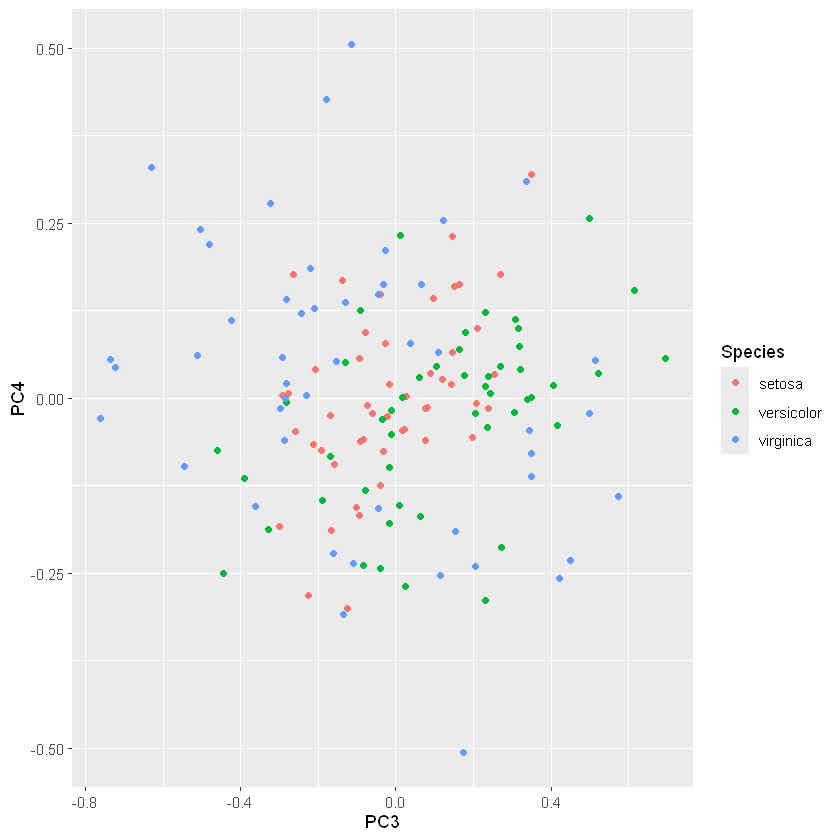

In [4]:
ggplot(iris, aes(x=PC1, y=PC2, color=Species)) + geom_point() 
ggplot(iris, aes(x=PC2, y=PC3, color=Species)) + geom_point() 
ggplot(iris, aes(x=PC3, y=PC4, color=Species)) + geom_point() 

We see that we only need PC1 and PC2.

In [6]:
I = data.frame(x=PC1, y=PC2)

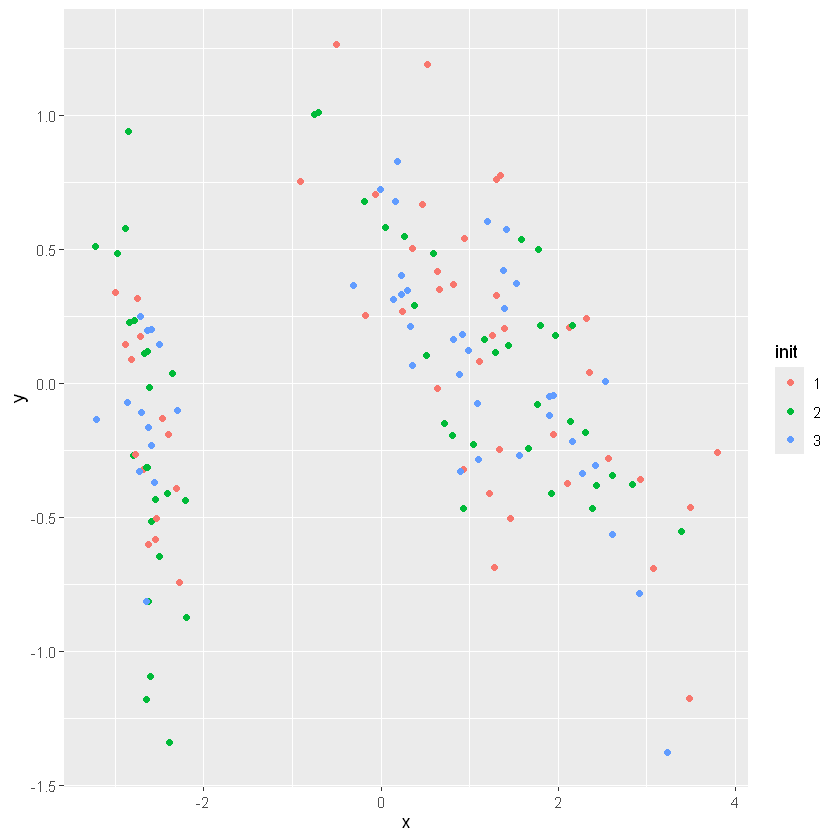

In [36]:
init = sample(3, nrow(I), replace=TRUE)
init = as.factor(init)
ggplot(I, aes(x=x, y=y, color=init)) + geom_point()

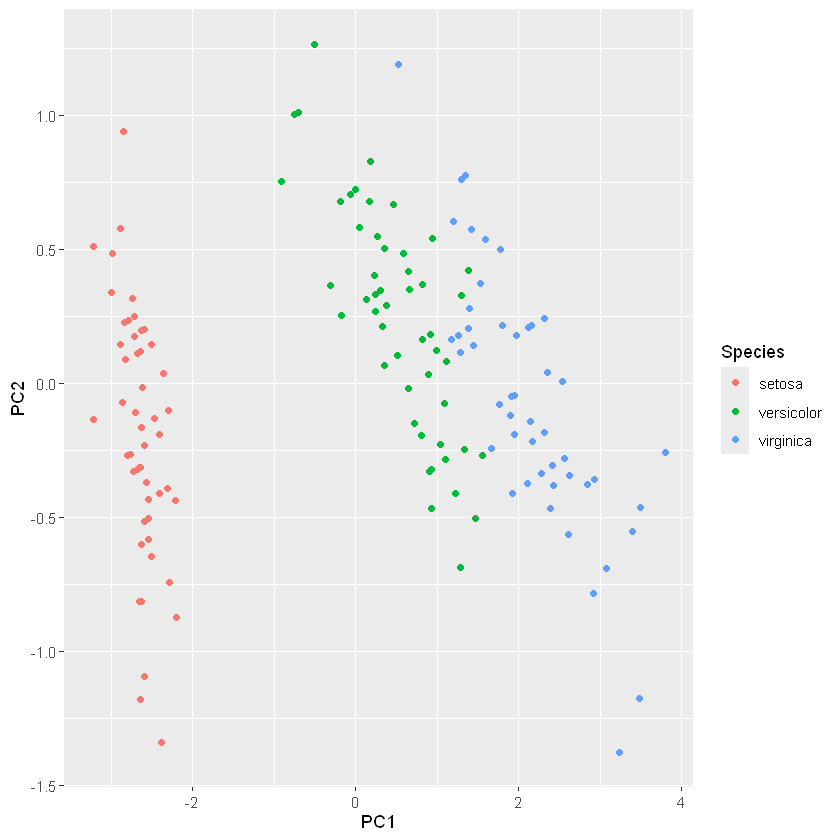

In [9]:
ggplot(I, aes(x=PC1, y=PC2, color=Species)) + geom_point()

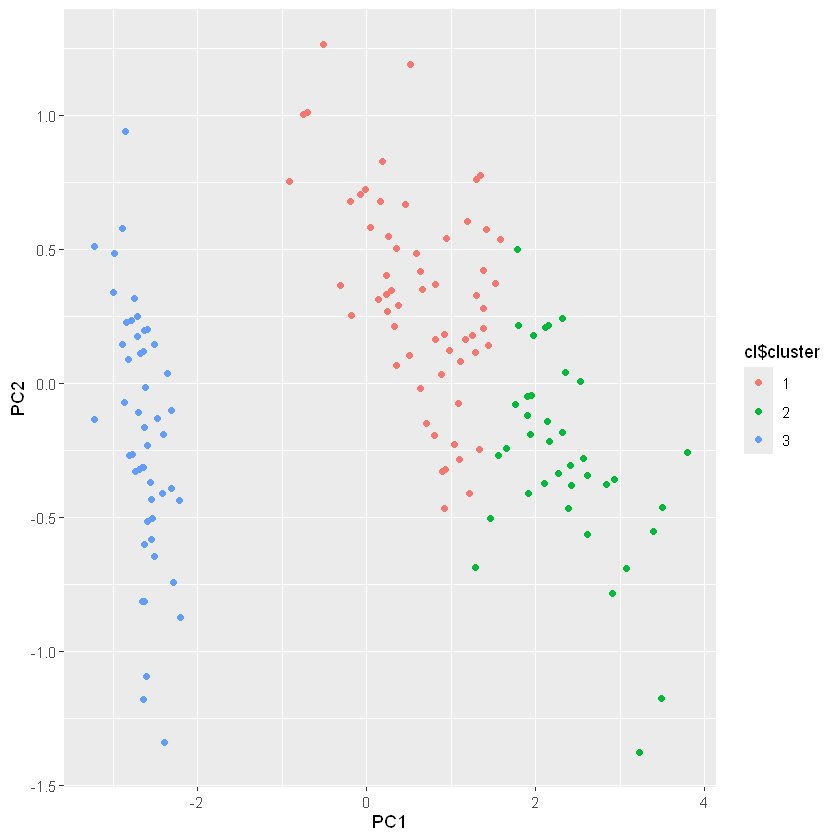

In [12]:
cl = kmeans(I, 3, nstart=100)
sp = replace(cl$cluster, cl$cluster==1, "versicolor")
sp = replace(sp, cl$cluster==2, "virginica")
sp = replace(sp, cl$cluster==3, "setosa")

ggplot(I, aes(x=PC1, y=PC2, color=as.factor(cl$cluster))) + geom_point()

In [18]:
print(table(sp, Species))

            Species
sp           setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         47        14
  virginica       0          3        36


In [21]:
acc = (50+47+36)/(50+47+36+14+3)
print(acc)

[1] 0.8866667


In [25]:
within = c()
for (i in 1:10) {
    cl = kmeans(I, i, nstart=100)
    within = c(within, cl$tot.withinss)
}

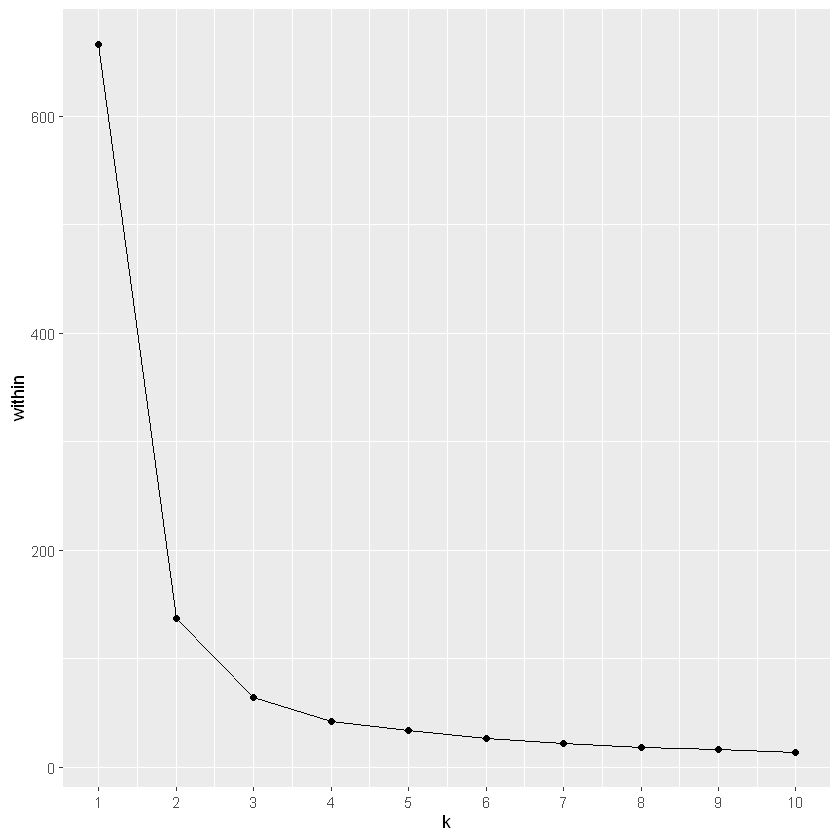

In [32]:
ggplot(data.frame(k=1:10, within=within), aes(x=k, y=within)) + geom_point() + geom_line()+
      scale_x_continuous(breaks = seq(0, 10, by = 1))

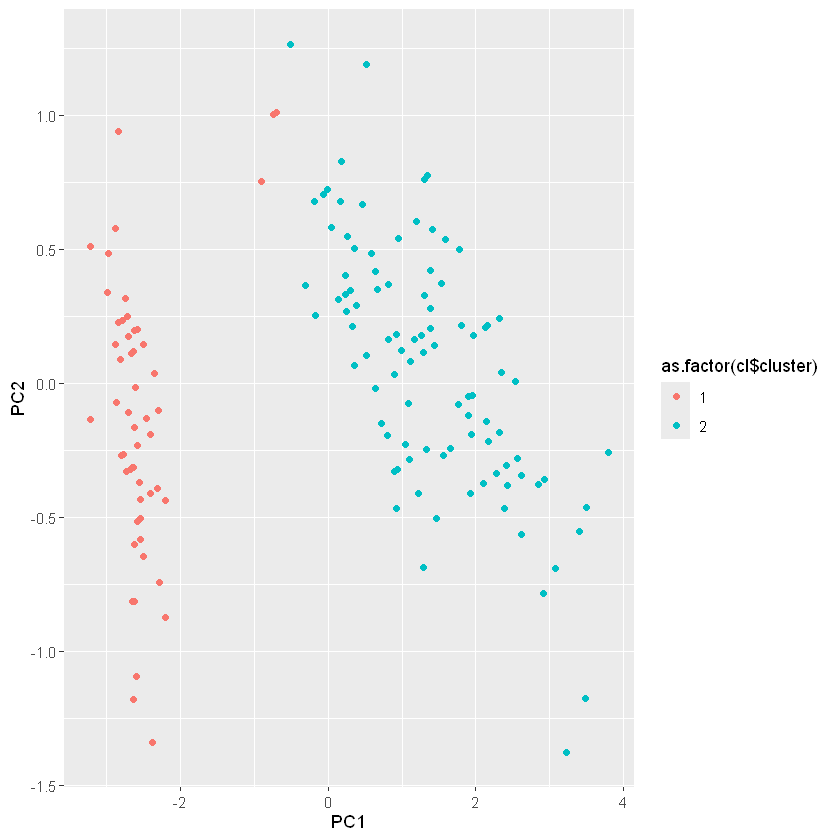

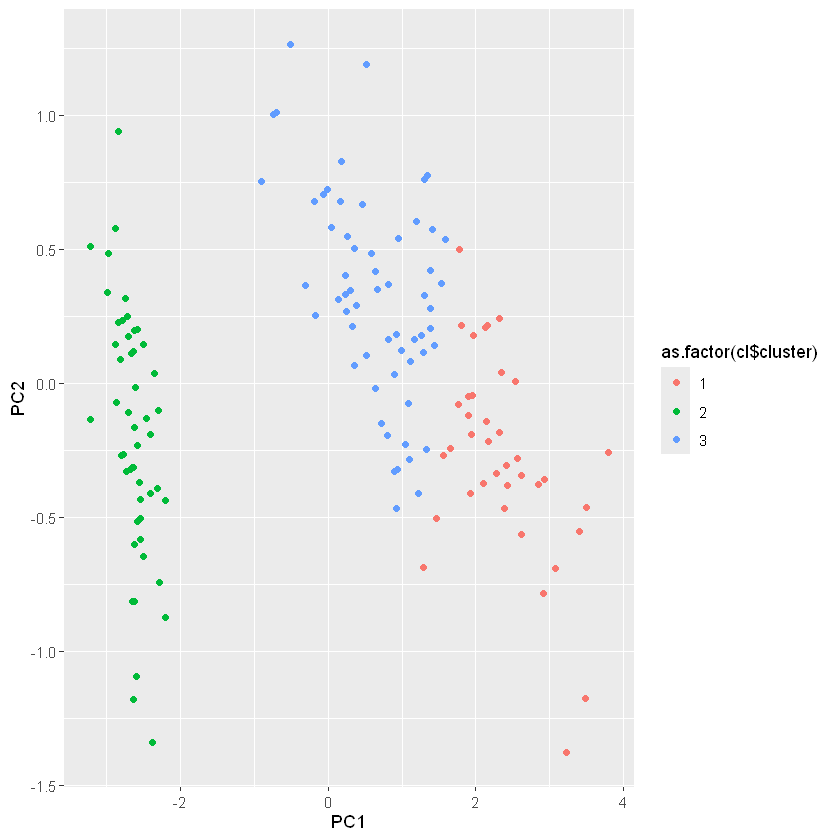

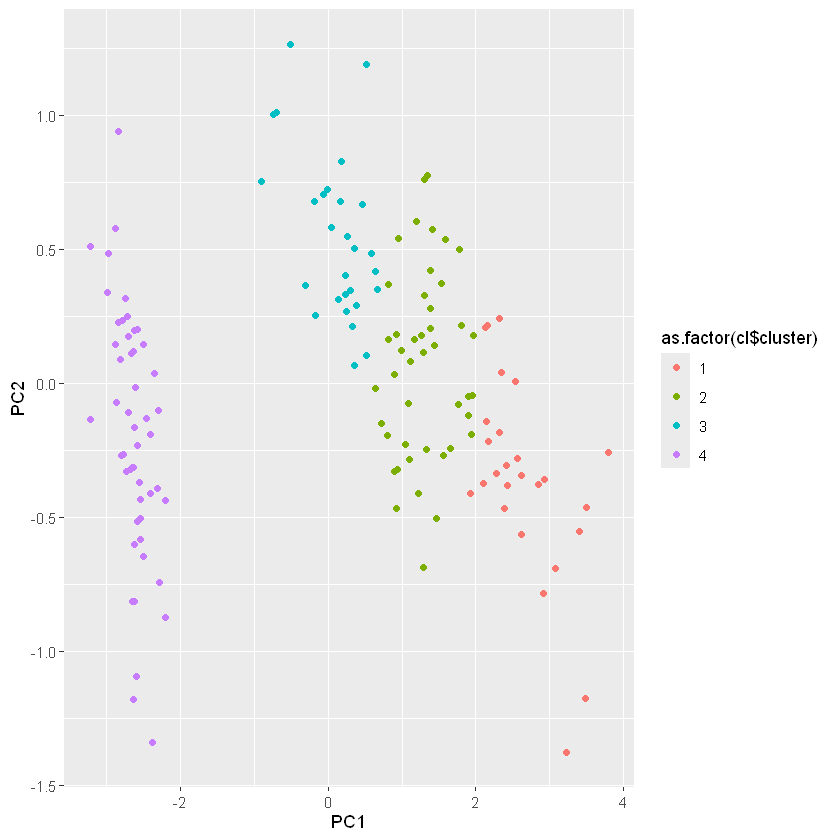

In [33]:
cl = kmeans(I, 2, nstart=100)
ggplot(I, aes(x=PC1, y=PC2, color=as.factor(cl$cluster))) + geom_point()

cl = kmeans(I, 3, nstart=100)
ggplot(I, aes(x=PC1, y=PC2, color=as.factor(cl$cluster))) + geom_point()

cl = kmeans(I, 4, nstart=100)
ggplot(I, aes(x=PC1, y=PC2, color=as.factor(cl$cluster))) + geom_point()

We see that k=3 appears to be the most optimal k.